In [1]:
%matplotlib inline
from modsim import *

In [2]:
from pandas import read_html

Import US History.com Data

In [3]:
filename = 'http://www.u-s-history.com/pages/h980.html' 
tables = read_html (filename, 
                    header = 0, 
                    index_col = 0,
                    decimal = 'M')

In [4]:
table1a = tables[2]

In [5]:
table1a.columns = [ 'pop1ushis', 'increase', 'incp', 'urban', 'rural',]

table1a.head()

,pop1ushis,increase,incp,urban,rural
Census Year,,,,,
1790,3929214,-,-,5.1,94.9
1800,5308483,1379269,35.1,6.1,93.9
1810,7239881,1931398,36.4,15.4,92.7
1820,9638453,2398572,33.1,7.2,92.8
1830,12860702,3222249,33.4,8.8,91.2


In [6]:
table1a.tail()

,pop1ushis,increase,incp,urban,rural
Census Year,,,,,
1960,189323175,27997377,18.5,69.9,30.1
1970,213302031,23978856,13.4,73.6,26.3
1980,236542199,23240168,11.4,73.7,26.3
1990,258709873,22167674,9.8,75.2,24.8
2000,291421906,32712033,13.2,81.0,19.0


In [7]:
pop1ushis = table1a.pop1ushis / 1e6

In [8]:
pop1ushis.values

array([   3.929214,    5.308483,    7.239881,    9.638453,   12.860702,
         17.063353,   23.191876,   31.443321,   38.558371,   50.189209,
         62.979766,   76.212168,   92.228496,  106.021537,  123.202624,
        142.164569,  161.325798,  189.323175,  213.302031,  236.542199,
        258.709873,  291.421906])

In [9]:
pop1ushis.index

Int64Index([1790, 1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890,
            1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000],
           dtype='int64', name='Census Year')

In [10]:
first_year1 = pop1ushis.index[0]
last_year1 = pop1ushis.index[-1]

Saving figure to file chap03-fig01.pdf


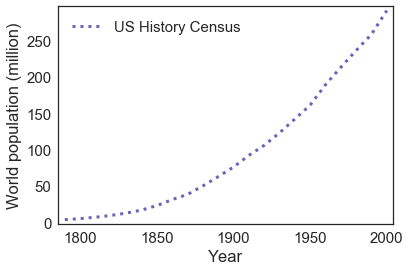

In [11]:
def plot_estimates(table):
    """Plot world population estimates.
    
    table: DataFrame with columns 'un' and 'census'
    """
    pop1ushis = table1a.pop1ushis / 1e6
   
    plot(pop1ushis, ':', color='darkblue', label='US History Census')
    
    decorate(xlabel='Year',
             ylabel='World population (million)')
    
newfig()
plot_estimates(table1a)
savefig('chap03-fig01.pdf')

Insert Wikipedia.org Data

In [12]:
filename = 'https://en.wikipedia.org/wiki/Demographic_history_of_the_United_States' 
tables = read_html (filename, 
                    header = 0, 
                    index_col = 0, 
                    decimal = 'M')

In [13]:
table1b = tables[3]

In [14]:
table1b.columns = ['pop2wiki']
table1b

,pop2wiki
Census year,
NaN,NaN
1610.0,350.0
1620.0,2302.0
1630.0,4646.0
1640.0,26634.0
1650.0,50368.0
1660.0,75058.0
1670.0,111935.0
1680.0,151507.0


In [15]:
pop2wiki = table1b.pop2wiki / 1e6

In [16]:
first_year2 = pop2wiki.index[1]
last_year2 = pop2wiki.index[-1]

In [17]:
def plot_estimates():
    pop1ushis = table1a.pop1ushis / 1e6
    pop2wiki = table1b.pop2wiki / 1e6
    
    plot(pop1ushis, ':', color='darkblue', label = 'US History')
    plot(pop2wiki, '--', color='green', label = 'Wikipedia')
    
    decorate(xlabel='Year',
             ylabel='US population (billion)')

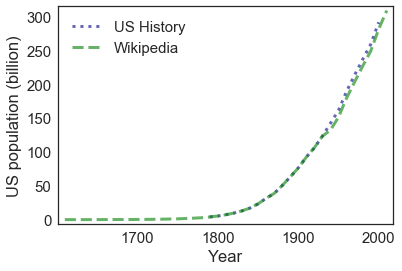

In [18]:
plot_estimates()

QUADRATIC GROWTH MODEL

US History Data

In [100]:
pop1ushis = table1a.pop1ushis / 1e6
t01 = pop1ushis.index[1]
t_end1 = pop1ushis.index[-1]
p01=pop1ushis[first_year1]

In [101]:
alpha1 = 0.025
beta1 = -0.0018

In [102]:
system1 = System(t01 = t01,
                t_end1 = t_end1,
                p01 = p01,
                pop1ushis = pop1ushis)

In [103]:
net_growth1 = alpha1 * pop1ushis

In [104]:
net_growth1 = alpha1 * pop1ushis + beta1 * pop1ushis**2

In [105]:
death_rate1 = 0.01
birth_rate1 = 0.027

In [106]:
alpha1 = birth_rate1 - death_rate1

In [107]:
def update_func1(pop1, t, system1):
    net_growth1 = alpha1 * pop1ushis + beta1 * pop1ushis**2
    return pop1 + net_growth1

In [108]:
def run_simulation1(system1, update_func1):
    results1 = TimeSeries()
    results1[system1.t01] = system1.p01
    for t in linrange(system1.t01, system1.t_end1):
        results1[t+1] = update_func1(results1[t], t, system1)
    system1.results1 = results1

In [109]:
run_simulation1(system1, update_func1)

In [110]:
pop_array1 = linspace(0.001, 15, 100)
net_growth_array1 = (alpha1 * pop_array1 + beta1 * pop_array1**2)

In [111]:
def carrying_capacity1(system1):
    K1 = -system1.alpha1 / system1.beta1
    return K1
sys1 = System(alpha1=0.025, beta1=-0.0018)
pop1ushis = carrying_capacity1(sys1)
print(pop1ushis)


13.8888888889


In [112]:
def plot_results1(system1):
    newfig()
    plot_estimates()
    plot(system1.results1, '--', color='gray', label='model')
    decorate(xlabel='Year',
            ylabel='US population (Million)',
            ylim=[0,350])

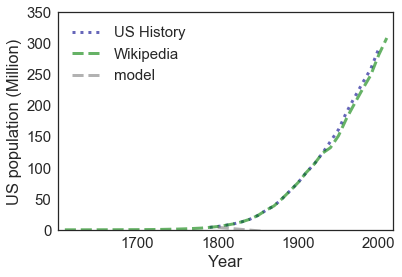

In [113]:
newfig()
run_simulation1(system1,update_func1)
plot_results1(system1)

Wikipedia Data

In [116]:
alpha2 = 0.025
beta2 = -0.0018

In [123]:
death_rate2 = 0.01
birth_rate2 = 0.027

In [135]:
pop2wiki = table1b.pop2wiki / 1e6
t02 = pop2wiki.index[1]
t_end2 = pop2wiki.index[-1]
p02=pop2wiki[first_year1]

In [136]:
system2 = System(t02 = t02,
                t_end2 = t_end2,
                p02 = p02,
                pop2wiki = pop2wiki)

In [137]:
net_growth2 = alpha2 * pop2wiki

In [138]:
def update_func2(pop2wiki, t, system2):
    net_growth2 = alpha2 * pop2wiki + beta2 * pop2wiki**2
    return pop2wiki + net_growth2

In [139]:
alpha2 = birth_rate2 - death_rate2

In [140]:
net_growth2 = alpha2 * pop2wiki + beta2 * pop2wiki**2

In [141]:
def run_simulation2(system2, update_func2):
    results2 = TimeSeries()
    results2[system2.t02] = system2.p02
    for t in linrange(system2.t02, system2.t_end2):
        results2[t+1] = update_func2(results2[t], t, system2)
    system2.results2 = results2

In [142]:
run_simulation2(system2, update_func2)

In [143]:
pop_array2 = linspace(0.001, 15, 100)
net_growth_array2 = (alpha2 * pop_array2 + beta2 * pop_array2**2)

In [144]:
def carrying_capacity2(system):
    K = -alpha2 / beta2
    return K
sys2 = System(alpha2=0.025, beta2=-0.0018)
pop2wiki = carrying_capacity2(sys2)
print(pop2wiki)

9.444444444444445


In [149]:
def plot_results2(system2):
    newfig()
    plot_estimates()
    plot(system2.results2, '--', color='gray', label='model')
    decorate(xlabel='Year',
            ylabel='US population (Million)',
            ylim=[0,350])

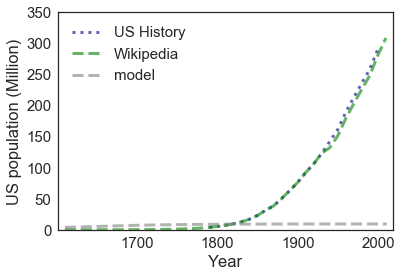

In [151]:
newfig()
run_simulation2(system2,update_func2)
plot_results2(system2)